In [128]:
import pandas as pd
import warnings
import numpy as np
warnings.filterwarnings(action='ignore')
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
from pandas.plotting import lag_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [102]:
series = pd.read_excel('C:\\Users\\dell\\Desktop\\timeseries\\HBS_Table_No._162___Monthly_Average_Price_of_Gold_and_Silver_in_Domestic_and_Foreign_Markets.xlsx', header =2)

In [106]:
def preprocessing_gold(series):
    gold = series[['Unnamed: 2','Gold']]
    gold.rename({'Unnamed: 2':'month'}, axis=1, inplace=True)
    gold = gold[gold['month'] != 'Average']
    gold =  gold.iloc[2:]
    gold =  gold.iloc[:-2]
    gold.reset_index(drop = True, inplace= True)
    
    gold['x'] = np.nan
    for x in range(len(gold['month'])):
        if gold['month'][x] not in ['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']:
            gold['x'][x] = gold['month'][x]
        else:
            pass
        x = x+1
        
    gold.ffill(inplace=True)
    # remove rows of nan
    index = []
    for x in range(len(gold['month'])):
        if gold['month'][x] not in ['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']:
            index.append(gold['month'][x])
        else:
            pass
    for x in range(len(gold.x)):
        gold.x[x]=gold.x[x][:4]
    gold = gold[~gold['month'].isin(index)]
    gold.reset_index(drop = True, inplace= True)
        
    monthdict = {'JAN':'01-01','FEB':'02-01','MAR':'03-01','APR':'04-01','MAY':'05-01','JUN':'06-01','JUL':'07-01','AUG':'08-01','SEP':'09-01','OCT':'10-01','NOV':'11-01','DEC':'12-01'}
    gold['month'] = gold['month'].map(monthdict)
    
    for x in range(len(gold.x)):
        if gold['month'][x] in ['01-01','02-01','03-01']:
            gold['x'][x] = str(int(gold['x'][x])+1)
        else:
            pass
    gold['year'] = gold['x'].str.cat(gold['month'], sep ="-")
    
    gold.drop(['month','x'], axis=1, inplace=True)
    gold.year = pd.to_datetime(gold.year)
    gold = gold.iloc[::-1]
    gold.reset_index(inplace = True, drop = True)
    
    return gold
    

In [104]:
def dataanlysis(gold):
    
    gold['month'] = gold['year'].dt.month_name(locale = 'English')
    gold['year2'] = gold['year'].dt.year
       
    plt.figure(figsize=(20,8))
    x = sns.boxplot(gold['year2'],  gold['Gold'])
    
    plt.figure(figsize=(15,7))
    y =sns.lineplot(gold.loc[gold['year2'] == 2000]['month'],gold.loc[gold['year2'] == 2000]['Gold'])
    
    plt.figure(figsize = (15,7))
    z =sns.lineplot(gold[9:]['month'], gold[9:]['Gold'], hue= gold[9:]['year2'])
    
    #plt.figure(figsize = (10,10))
    #a = sns.lineplot(gold[117:249]['month'], gold[117:249]['Gold'], hue= gold[117:249]['year2'])
    
    #plt.figure(figsize = (20,10))
    #b = sns.lineplot(gold[249:]['month'], gold[249:]['Gold'], hue= gold[249:]['year2'])
    
    plt.figure(figsize = (15,7))
    c = sns.lineplot(gold['year'], gold['Gold'], hue= gold['month'])
    
    plt.figure(figsize = (15,7))
    d = sns.distplot(gold['Gold'], gold['year2'])
    
    
    return c,x,y,z,d
    
    
    

In [122]:
gold = preprocessing_gold(series)
gold

,Gold,year
0,3416.50,1990-04-01
1,3431.40,1990-05-01
2,3314.35,1990-06-01
3,3284.80,1990-07-01
4,3414.71,1990-08-01
...,...,...
371,44647.57,2021-03-01
372,46517.21,2021-04-01
373,47860.25,2021-05-01
374,47890.86,2021-06-01


In [145]:
def timeseries_analysis(series):
    
    series.set_index('year', inplace = True)

    def adffullertest(series):
        result = adfuller(series)
        print(f'Test statistics :{result[0]}')
        print(f'p-value:{result[1]}')
        print(f'critical values :{result[4]}')
        if result[1] > 0.05 :
            print('series is not stationary')
        else:
            print('Series is stationary')
    res = adffullertest(series)
    
    plot_acf(series)
    plt.show()
    
    plot_pacf(series)
    plt.show()
    
    decomposition = seasonal_decompose(series, period=12)
    fig = decomposition.plot()
    fig.set_figwidth(10)
    fig.set_figheight(8)
    plt.suptitle('Decomposition of multiplicative time series')
    print('Mean of residuals',decomposition.resid.mean())
   
    
    
    
    

Test statistics :1.0367861776576992
p-value:0.9946393132018491
critical values :{'1%': -3.448544133483233, '5%': -2.8695574079525565, '10%': -2.5710411593052713}
series is not stationary


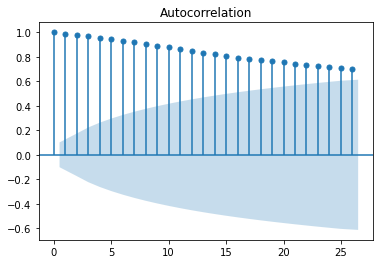

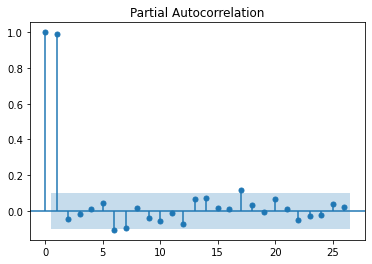

Mean of residuals 14.544361302539631


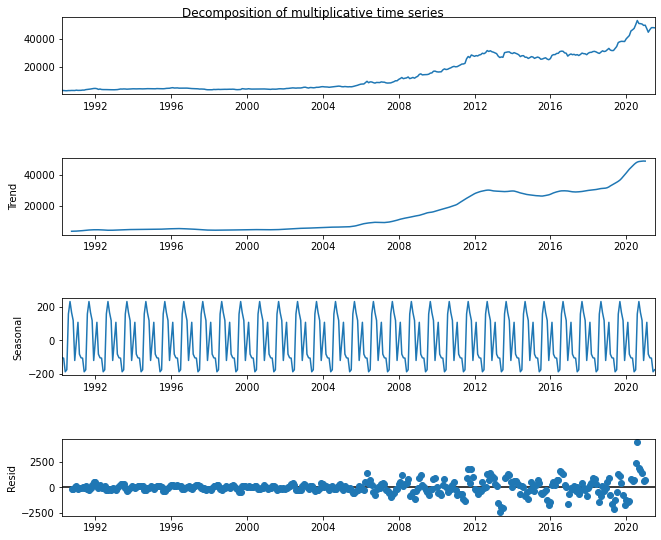

In [146]:
timeseries_analysis(gold)